Setup & Dependencies

In [ ]:
# install joblib, which will be used to save model.
# Restart kernel after installing
!pip install joblib

In [ ]:
import pandas as pd
import numpy as np

Load Dataset and Perform Basic Cleaning.

In [ ]:
url="https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&format=csv"

df=pd.read_csv(url)

In [ ]:
df

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,19h48m01.16s,+48d08m02.9s,15.436,NaN
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,4.564,0.053,-0.168,0.791,0.201,-0.067,19h02m08.31s,+48d17m06.8s,15.597,NaN
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,19h15m01.17s,+48d13m34.3s,15.509,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,4.529,0.035,-0.196,0.903,0.237,-0.079,19h48m45.30s,+47d05m37.7s,14.082,NaN
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,4.444,0.056,-0.224,1.031,0.341,-0.114,19h06m02.25s,+47d09m47.6s,14.757,NaN
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,4.447,0.056,-0.224,1.041,0.341,-0.114,19h36m39.57s,+47d10m34.6s,15.385,NaN
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,2.992,0.030,-0.027,7.824,0.223,-1.896,19h47m03.09s,+47d08m42.5s,10.998,NaN


In [ ]:
df.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra_str', 'dec_str', 'koi_kepmag',
       'koi_kepmag_err'],
      dtype='object')

In [ ]:
# 🌌 Select Best Columns for Exoplanet Classification

# Best columns selected for ML
useful_cols = [
    'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth',
    'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr',
    'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag',
    'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
    'koi_disposition'
]

# Keep only useful data and remove missing values
df = df[useful_cols].dropna()

# Display dataset info
print(" Final dataset shape:", df.shape)




 Final dataset shape: (9200, 18)


In [ ]:
df.to_csv('exoplanet_data.csv', index=False)


In [ ]:
df.count()

,0
koi_period,9200
koi_time0bk,9200
koi_impact,9200
koi_duration,9200
koi_depth,9200
koi_prad,9200
koi_teq,9200
koi_insol,9200
koi_model_snr,9200
koi_steff,9200


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Missing values drop
df_clean = df.dropna()

# Encode target variable (Confirmed=2, Candidate=1, False Positive=0)
df_clean['label'] = df_clean['koi_disposition'].map({
    'CONFIRMED': 2,
    'CANDIDATE': 1,
    'FALSE POSITIVE': 0
})

print(df_clean['label'].value_counts())

label
0    4581
2    2744
1    1875
Name: count, dtype: int64


/tmp/ipython-input-4047247299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='koi_disposition', data=df_clean, palette='viridis')


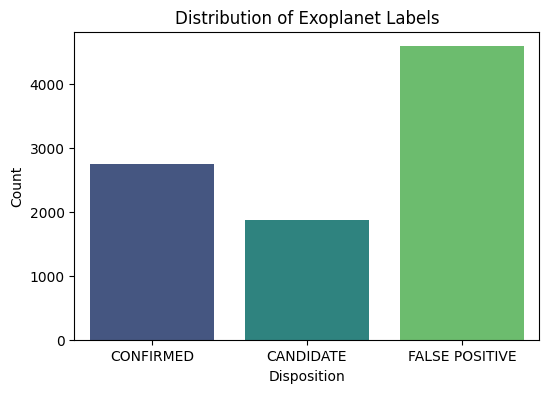

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='koi_disposition', data=df_clean, palette='viridis')
plt.title("Distribution of Exoplanet Labels")
plt.xlabel("Disposition")
plt.ylabel("Count")
plt.show()

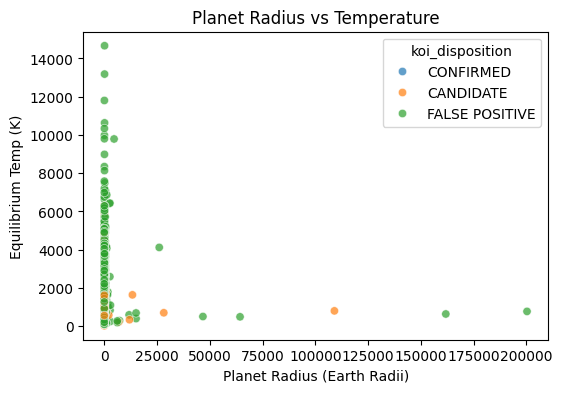

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='koi_prad', y='koi_teq', hue='koi_disposition', data=df_clean, alpha=0.7)
plt.title("Planet Radius vs Temperature")
plt.xlabel("Planet Radius (Earth Radii)")
plt.ylabel("Equilibrium Temp (K)")
plt.show()

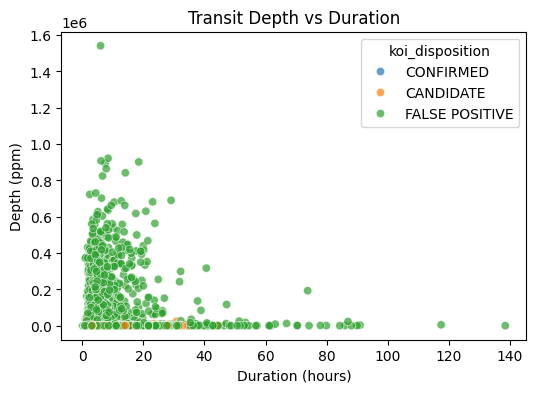

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='koi_duration', y='koi_depth', hue='koi_disposition', data=df_clean, alpha=0.7)
plt.title("Transit Depth vs Duration")
plt.xlabel("Duration (hours)")
plt.ylabel("Depth (ppm)")
plt.show()

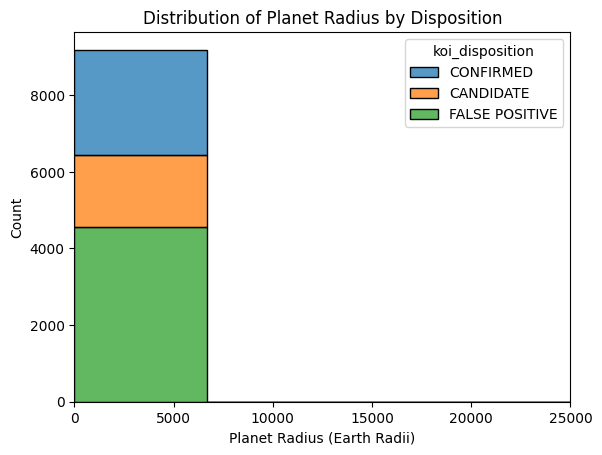

In [ ]:
sns.histplot(data=df, x='koi_prad', bins=30, hue='koi_disposition', multiple='stack')
plt.xlim(0, 25000)
plt.title("Distribution of Planet Radius by Disposition")
plt.xlabel("Planet Radius (Earth Radii)")
plt.show()


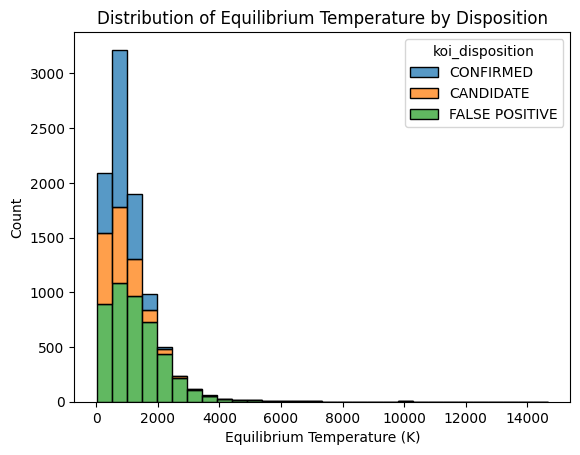

In [ ]:
sns.histplot(data=df, x='koi_teq', bins=30, hue='koi_disposition', multiple='stack')
plt.title("Distribution of Equilibrium Temperature by Disposition")
plt.xlabel("Equilibrium Temperature (K)")
plt.show()


In [ ]:
 df['koi_teq']


,koi_teq
0,793.0
1,443.0
2,638.0
3,1395.0
4,1406.0
...,...
9559,2088.0
9560,1608.0
9561,2218.0
9562,557.0


/tmp/ipython-input-387613942.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='koi_disposition', y='koi_teq', data=df, palette='Set3')


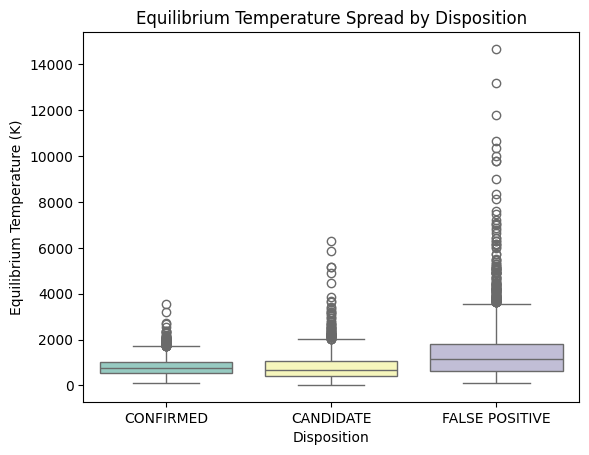

In [ ]:
sns.boxplot(x='koi_disposition', y='koi_teq', data=df, palette='Set3')
plt.title("Equilibrium Temperature Spread by Disposition")
plt.ylabel("Equilibrium Temperature (K)")
plt.xlabel("Disposition")
plt.show()


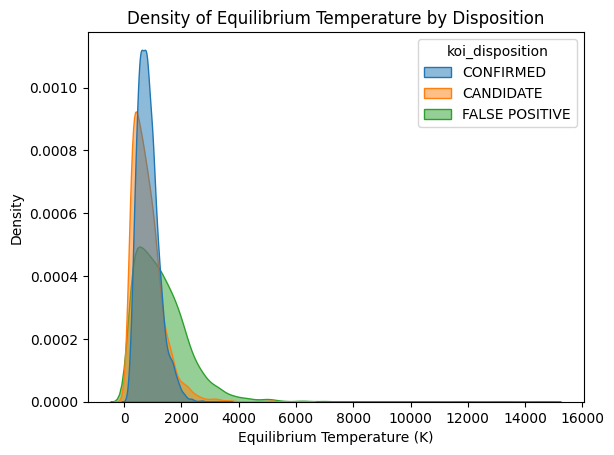

In [ ]:
sns.kdeplot(data=df, x='koi_teq', hue='koi_disposition', fill=True, common_norm=False, alpha=0.5)
plt.title("Density of Equilibrium Temperature by Disposition")
plt.xlabel("Equilibrium Temperature (K)")
plt.show()


Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Define Features & Target

In [ ]:
features = [
    'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration',
    'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol',
    'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad',
    'koi_kepmag', 'koi_fpflag_nt', 'koi_fpflag_ss',
    'koi_fpflag_co', 'koi_fpflag_ec'
]

target = 'label'


Create A Train/Test Split

In [ ]:
X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7360, 17)
(7360,)
(1840, 17)
(1840,)


In [ ]:
X_train.head()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,koi_kepmag,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec
2179,29.225437,143.987640,0.384,5.2930,174.1,1.35,614.0,33.69,15.7,6049.0,4.461,1.008,14.162,0,0,0,0
62,7.240661,137.755450,1.198,0.5580,556.4,19.45,734.0,68.63,13.7,5005.0,4.595,0.765,15.334,0,0,0,0
6366,1.534680,132.331163,0.108,1.7237,456.6,18.39,3570.0,38505.56,64.6,4965.0,2.863,8.834,12.224,0,1,0,0
7176,16.295785,133.620500,0.603,5.1600,409.8,2.13,744.0,72.62,14.2,6063.0,4.476,1.012,15.735,0,0,0,0
1413,4.580346,134.075400,0.384,2.0970,308.3,1.38,889.0,147.56,49.8,5103.0,4.558,0.789,13.693,0,0,0,0


In [ ]:
y.head()

,label
0,2
1,2
2,1
3,0
4,2


Scaling: --Scale the data and perform some feature selection

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
scaler = StandardScaler()
#X_train_scaled = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train RandomForest Model without GridSearch




In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train_scaled, y_train)

Random Forest Classifier Accuracy without Grid search

In [ ]:
print(f"Training Data Score with Random Forest Classifier: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score with Random Forest Classifier: {clf.score(X_test_scaled, y_test)}")

Training Data Score with Random Forest Classifier: 1.0
Testing Data Score with Random Forest Classifier: 0.9217391304347826


In [ ]:
#paramgrid1 = {"n_estimators": [50, 150, 250],
             #"max_depth":[100, 200, 300] }
paramgrid1 = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30],
    "min_samples_leaf": [5, 10]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf_grid_model = GridSearchCV(clf, paramgrid1)

In [ ]:
clf_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30], 'min_samples_leaf': [5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
print(clf_grid_model.best_score_)
print(clf_grid_model.best_params_)

0.9263586956521739
{'max_depth': 30, 'min_samples_leaf': 5, 'n_estimators': 200}


 Random Forest Classifier Accuracy with Gridsearch

In [ ]:
print(f"Training Data Score with Random Forest Classifier with grid search: {clf_grid_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score with Random Forest Classifier with grid search: {clf_grid_model.score(X_test_scaled, y_test)}")

Training Data Score with Random Forest Classifier with grid search: 0.9608695652173913
Testing Data Score with Random Forest Classifier with grid search: 0.9244565217391304


In [ ]:
rf_clf_prediction = clf_grid_model.predict(X_test_scaled)

Classification report for Random Forest Classifier with Grid Search

In [ ]:
print(classification_report(y_test, rf_clf_prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       916
           1       0.81      0.83      0.82       375
           2       0.89      0.88      0.88       549

    accuracy                           0.92      1840
   macro avg       0.90      0.90      0.90      1840
weighted avg       0.92      0.92      0.92      1840



In [ ]:
import joblib

# Save model
joblib.dump(clf_grid_model, 'exoplanet_model.pkl')

# Save scaler if you used one
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

XGBoost

In [ ]:
# --- CORRECTED XGBoost model with regularization ---
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=4,              # Reduced max_depth
    learning_rate=0.05,       # Lower learning rate to be more conservative
    gamma=0.1,                # Add gamma regularization
    objective='multi:softmax',
    num_class=3,
    random_state=42,
    early_stopping_rounds=10  # This is a key parameter to prevent overfitting
)

# An evaluation set is needed for early stopping
eval_set = [(X_test, y_test)]

# Fit the model with the evaluation set
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Make predictions
y_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.928804347826087
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       916
           1       0.84      0.82      0.83       375
           2       0.88      0.90      0.89       549

    accuracy                           0.93      1840
   macro avg       0.90      0.90      0.90      1840
weighted avg       0.93      0.93      0.93      1840



In [ ]:
# Save model
joblib.dump(xgb_model, 'exoplanet_model2.pkl')

# Save scaler if you used one
joblib.dump(scaler, 'scaler2.pkl')

['scaler2.pkl']

LightGBM

In [ ]:
# --- CORRECTED LightGBM model with regularization ---
import lightgbm as lgb
import joblib
from sklearn.metrics import accuracy_score, classification_report

lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=5,              # Slightly reduced depth
    learning_rate=0.05,       # Lower learning rate
    reg_alpha=0.1,            # L1 regularization
    reg_lambda=0.1,           # L2 regularization
    random_state=42
)

lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# --- SAVE THE NEW MODEL ---
# Save the newly trained LightGBM model
joblib.dump(lgb_model, 'exoplanet_model_lgbm.pkl')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3324
[LightGBM] [Info] Number of data points in the train set: 7360, number of used features: 17
[LightGBM] [Info] Start training from score -0.697232
[LightGBM] [Info] Start training from score -1.590595
[LightGBM] [Info] Start training from score -1.209878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

['exoplanet_model_lgbm.pkl']

Using SVM without Gridsearch

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train)
# predictions = svc_model.predict(X_test)
svm_predictions = svc_model.predict(X_test_scaled)

SVM Accuracy without Gridsearch

In [ ]:
print(f"Training Data Score: {svc_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svc_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8115489130434783
Testing Data Score: 0.8222826086956522


Hyperparameter Tuning

### Using SVM with Gridsearch
Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
paramgrid = {
                "C": [0.1,1,10,50,100],
                "gamma" : [0.0001, 0.001, 0.01, 0.1]
            }
svm_grid_model = GridSearchCV(svc_model, paramgrid)

In [ ]:
# Train the model with GridSearch
svm_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [ ]:
print(svm_grid_model.best_params_)
print(svm_grid_model.best_score_)

{'C': 50, 'gamma': 0.0001}
0.819836956521739


SVM Accuracy with Gridsearch

In [ ]:
print(f"Training Data Score: {svm_grid_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_grid_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8161684782608696
Testing Data Score: 0.8244565217391304


In [ ]:
svm_grid_predictions = svm_grid_model.predict(X_test_scaled)

Classification report with SVM with Grid Search

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_grid_predictions))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       916
           1       0.86      0.31      0.46       375
           2       0.64      0.95      0.77       549

    accuracy                           0.82      1840
   macro avg       0.83      0.74      0.73      1840
weighted avg       0.86      0.82      0.81      1840



In [ ]:
joblib.dump(svm_grid_model, 'exoplanet_model4.pkl')

# Save scaler if you used one
joblib.dump(scaler, 'scaler4.pkl')

['scaler4.pkl']

Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [ ]:
lcf = LogisticRegression()

In [ ]:
lcf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Logistic Regression Model Accuracy

In [ ]:
print(f"Training Data Score with Logistic Regression Classifier: {lcf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score with Logistic Regression Classifier: {lcf.score(X_test_scaled, y_test)}")

Training Data Score with Logistic Regression Classifier: 0.8078804347826087
Testing Data Score with Logistic Regression Classifier: 0.8179347826086957


K Nearest Neighbourhood

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
print(f"Training Data Score with KNN Classifier: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score with KNN Classifier: {knn.score(X_test_scaled, y_test)}")

Training Data Score with KNN Classifier: 0.8419836956521739
Testing Data Score with KNN Classifier: 0.7847826086956522


In [ ]:
paramgrid_knn = {"n_neighbors": [5, 10, 20] }

In [ ]:
grid_knn = GridSearchCV(knn, paramgrid_knn)

In [ ]:
grid_knn.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 20]})

In [ ]:
grid_knn.best_params_

{'n_neighbors': 20}

KNN Accuracy

In [ ]:
print(f"Training Data Score with KNN Classifier with Gridsearch: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score with KNN Classifier with Gridsearch: {knn.score(X_test_scaled, y_test)}")

Training Data Score with KNN Classifier with Gridsearch: 0.8419836956521739
Testing Data Score with KNN Classifier with Gridsearch: 0.7847826086956522


## Conclusion
After comparing all the models, it looks like Random Forest Classifier,XGBoost, LightGBM gives the best Accuracy Score.

### Logistic Regression Score
* Training Data Score: 0.8078804347826087
* Testing Data Score: 0.817934782608695

### KNN Score without Gridsearch
* Training Data Score: 0.8419836956521739
* Testing Data Score: 0.7847826086956522

### KNN Score with Gridsearch
* Training Data Score: 0.8419836956521739
* Testing Data Score: 0.7847826086956522

### Random Forest Classifier Score without Gridsearch
* Training Data Score: 1.0
* Testing Data Score: 0.925

### Random Forest Classifier Score with Gridsearch
* Training Data Score:  0.9608695652173913
* Testing Data Score: 0.9201086956521739

### Random Forest Classification report


In [ ]:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       916
           1       0.81      0.83      0.82       375
           2       0.89      0.88      0.88       549

    accuracy                           0.92      1840
   macro avg       0.90      0.90      0.90      1840
weighted avg       0.92      0.92      0.92      1840

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)

### SVM without Gridsearch
* Training Data Score: 0.8115489130434783
* Testing Data Score: 0.8222826086956522

### SVM with Gridsearch
* Training Data Score: 0.8161684782608696
* Testing Data Score: 0.8244565217391304

### SVM Classification Report

In [ ]:
                precision    recall  f1-score   support

           0       0.99      0.96      0.97       916
           1       0.86      0.31      0.46       375
           2       0.64      0.95      0.77       549

    accuracy                           0.82      1840
   macro avg       0.83      0.74      0.73      1840
weighted avg       0.86      0.82      0.81      1840

###  XGBoost Score
 * XGBoost Accuracy: 0.9298913043478261

### XGBoost Classification Report



In [ ]:
                precision    recall  f1-score   support

           0       1.00      0.99      1.00       916
           1       0.84      0.82      0.83       375
           2       0.88      0.90      0.89       549

    accuracy                           0.93      1840
   macro avg       0.91      0.90      0.90      1840
weighted avg       0.93      0.93      0.93      1840

### LightGBM Score
* LightGBM Accuracy: 0.9309782608695653

### LightGBM Classification Report

In [ ]:
                precision    recall  f1-score   support

           0       1.00      0.99      1.00       916
           1       0.82      0.81      0.82       375
           2       0.87      0.89      0.88       549

    accuracy                           0.92      1840
   macro avg       0.90      0.90      0.90      1840
weighted avg       0.92      0.92      0.92      1840